In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 数据导入及处理
## 导入数据
包括nodes,edges,features

In [2]:
dfnodes = pd.read_csv('github数据集/musae_git_target.csv')
dfnodes

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1
...,...,...,...
37695,37695,shawnwanderson,1
37696,37696,kris-ipeh,0
37697,37697,qpautrat,0
37698,37698,Injabie3,1


In [3]:
dfedges = pd.read_csv('github数据集/musae_git_edges.csv')
dfedges

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982
...,...,...
288998,37527,37596
288999,37529,37601
289000,37644,2347
289001,25879,2347


In [4]:
dfstars = pd.read_csv('github数据集/musae_git_features.csv')
dfstars

,node,feature
0,0,1574
1,0,3773
2,0,3571
3,0,2672
4,0,2478
...,...,...
690369,37699,1764
690370,37699,3771
690371,37699,234
690372,37699,968


In [5]:
# 汇总每个节点的stars数量
group_stars = dfstars.groupby('node')
#group_stars.apply(print)

In [6]:
sum_stars = group_stars.sum()
sum_stars

,feature
node,
0,42862
1,23812
2,33559
3,34022
4,32979
...,...
37695,46126
37696,29251
37697,39222


In [7]:
# 将stars属性加入表格
dfnodes['stars']=sum_stars['feature']
dfnodes

,id,name,ml_target,stars
0,0,Eiryyy,0,42862
1,1,shawflying,0,23812
2,2,JpMCarrilho,1,33559
3,3,SuhwanCha,0,34022
4,4,sunilangadi2,1,32979
...,...,...,...,...
37695,37695,shawnwanderson,1,46126
37696,37696,kris-ipeh,0,29251
37697,37697,qpautrat,0,39222
37698,37698,Injabie3,1,43347


In [8]:
# 节点按stars数量排序
sort_dfnodes = dfnodes.sort_values(ascending = False, by='stars')
sort_dfnodes

,id,name,ml_target,stars
1687,1687,DaiAoki,0,86860
6917,6917,DigitalMachinist,0,76497
36609,36609,VladimirAndropov,1,76492
11304,11304,adrianbadarau,0,76060
16224,16224,bencyn,0,75897
...,...,...,...,...
24171,24171,longting,0,13702
6720,6720,csming1995,0,13649
8504,8504,nks5295,0,13526
529,529,ahsanatha,1,11571


## 选择数据
选择stars数量前1000的github开发者

In [9]:
ori_nodes = sort_dfnodes[0:1000]
ori_nodes

,id,name,ml_target,stars
1687,1687,DaiAoki,0,86860
6917,6917,DigitalMachinist,0,76497
36609,36609,VladimirAndropov,1,76492
11304,11304,adrianbadarau,0,76060
16224,16224,bencyn,0,75897
...,...,...,...,...
13380,13380,landonia,1,54790
16459,16459,epdjsmit,0,54787
34857,34857,macagua,0,54786
27111,27111,cg219,0,54785


## 雪球抽样
二级抽样

In [10]:
#第一层抽样，从1000个初始点出发找和他们相连的用户
filter1 = dfedges['id_1'].isin(ori_nodes['id'])
edges_roll1=dfedges[filter1]
nodes_roll1_list = list(set.union(set(edges_roll1['id_1']),set(edges_roll1['id_2']))) #一层抽样后包含的节点
print(len(nodes_roll1_list))

2576


In [11]:
edges_roll1

,id_1,id_2
249,6071,5061
250,6071,31890
251,6071,31987
252,6071,11051
253,6071,1739
...,...,...
288150,35825,36680
288164,35851,36652
288819,21815,37115
288840,32216,2347


In [12]:
#一层抽样后的节点表
nodes_roll1_df = dfnodes[dfnodes['id'].isin(nodes_roll1_list)]
nodes_roll1_df

,id,name,ml_target,stars
56,56,TarrySingh,1,28184
73,73,kentcdodds,0,46726
88,88,keyvanakbary,0,36368
94,94,starkwang,0,34496
187,187,boxabirds,1,61691
...,...,...,...,...
37557,37557,davidsonfellipe,0,32214
37591,37591,dimitrinicolas,0,37715
37663,37663,gabriel-hahn,0,44426
37687,37687,llopez,0,50591


In [13]:
# 二层抽样
filter2 = dfedges['id_1'].isin(nodes_roll1_df['id'])
edges_roll2 = dfedges[filter2]
edges_roll2

,id_1,id_2
249,6071,5061
250,6071,31890
251,6071,31987
252,6071,11051
253,6071,1739
...,...,...
288987,37471,37627
288988,37471,37644
288989,37471,37393
288990,37471,25270


In [14]:
nodes_roll2_list = list(set.union(set(edges_roll2['id_1']),set(edges_roll2['id_2'])))
len(nodes_roll2_list)

19746

# 生成网络

In [15]:
# 一层抽样网络
g1 = nx.DiGraph()
edges_roll1_tuple = [tuple(x) for x in edges_roll1.values]
g1.add_edges_from(edges_roll1_tuple)
print(g1.number_of_edges())
print(g1.number_of_nodes())

2903
2576


In [16]:
# 二层抽样网络
g2 = nx.DiGraph()
edges_roll2_tuple = [tuple(x) for x in edges_roll2.values]
g2.add_edges_from(edges_roll2_tuple)
print(g2.number_of_edges())
print(g2.number_of_nodes())

68144
19746


# 网络结构统计特性

## 无标度现象-度分布

### g2度分布（度，入度，出度）

In [17]:
g2deg = g2.degree
# 度排序
sorted(dict(g2deg).items(),key=lambda kv:(-kv[1],kv[0]))

[(27803, 6813),
 (31890, 2616),
 (13638, 1678),
 (19222, 1653),
 (9051, 1397),
 (2078, 1297),
 (35773, 1274),
 (7027, 1233),
 (10001, 1171),
 (5629, 1121),
 (73, 1091),
 (33671, 1080),
 (11051, 910),
 (19253, 755),
 (14242, 650),
 (6631, 518),
 (3712, 516),
 (18945, 504),
 (22881, 488),
 (14954, 453),
 (22642, 426),
 (10080, 422),
 (10830, 415),
 (23589, 411),
 (25477, 395),
 (20173, 384),
 (23664, 376),
 (22353, 362),
 (30002, 358),
 (2431, 347),
 (35008, 331),
 (21142, 327),
 (36652, 315),
 (36628, 314),
 (22321, 305),
 (15191, 301),
 (9633, 293),
 (11573, 290),
 (7006, 289),
 (20854, 288),
 (23838, 280),
 (9008, 279),
 (10568, 275),
 (18638, 269),
 (25249, 250),
 (11814, 241),
 (28957, 238),
 (18163, 237),
 (33029, 234),
 (5061, 233),
 (30199, 232),
 (21375, 231),
 (16631, 228),
 (15405, 218),
 (13857, 214),
 (6645, 212),
 (8357, 205),
 (27302, 202),
 (15192, 200),
 (32415, 197),
 (11081, 190),
 (18876, 190),
 (10403, 189),
 (27450, 189),
 (7339, 187),
 (21754, 186),
 (16726, 185),


In [38]:
print(list(dict(g2deg).values()).count(1))
print(list(dict(g2deg).values()).count(2))
print(list(dict(g2_odeg).values()).count(0))
print(list(dict(g2_odeg).values()).count(1))
print(list(dict(g2_ideg).values()).count(0))
print(list(dict(g2_ideg).values()).count(1))

8680
3734
17397
555
508
8621


In [18]:
# 出度
g2_odeg = g2.out_degree()
sorted(dict(g2_odeg).items(),key=lambda kv:(-kv[1],kv[0]))

[(27803, 6809),
 (31890, 1988),
 (13638, 1610),
 (19222, 1459),
 (9051, 1378),
 (2078, 1295),
 (7027, 1224),
 (10001, 1149),
 (5629, 1111),
 (73, 1085),
 (33671, 1064),
 (35773, 923),
 (11051, 882),
 (19253, 681),
 (14242, 608),
 (6631, 512),
 (18945, 494),
 (14954, 442),
 (10080, 416),
 (10830, 400),
 (22642, 393),
 (22881, 393),
 (3712, 380),
 (20173, 364),
 (23589, 346),
 (2431, 341),
 (22353, 315),
 (21142, 299),
 (25477, 298),
 (23664, 297),
 (9633, 288),
 (11573, 285),
 (7006, 283),
 (9008, 273),
 (22321, 268),
 (18638, 252),
 (30002, 236),
 (10568, 230),
 (20854, 230),
 (5061, 228),
 (11814, 228),
 (16631, 218),
 (23838, 213),
 (6645, 209),
 (25249, 205),
 (8357, 201),
 (15405, 199),
 (21375, 193),
 (13857, 192),
 (32415, 191),
 (7339, 180),
 (10403, 178),
 (7317, 175),
 (15192, 175),
 (4447, 169),
 (9532, 167),
 (18876, 167),
 (28957, 164),
 (16321, 163),
 (16726, 160),
 (11081, 158),
 (16390, 155),
 (17099, 154),
 (5673, 153),
 (21754, 149),
 (27302, 146),
 (25630, 145),
 (230

In [19]:
# 入度
g2_ideg = g2.in_degree()
sorted(dict(g2_ideg).items(),key=lambda kv:(-kv[1],kv[0]))

[(31890, 628),
 (35773, 351),
 (36628, 284),
 (36652, 257),
 (35008, 232),
 (19222, 194),
 (15191, 184),
 (18163, 171),
 (36790, 143),
 (33029, 140),
 (3712, 136),
 (16119, 133),
 (22666, 133),
 (30002, 122),
 (37471, 112),
 (33643, 105),
 (30199, 101),
 (35523, 101),
 (25477, 97),
 (22881, 95),
 (30809, 95),
 (36819, 94),
 (31917, 85),
 (37107, 83),
 (23664, 79),
 (22832, 78),
 (31659, 77),
 (31170, 76),
 (19253, 74),
 (28957, 74),
 (33952, 74),
 (29055, 71),
 (13638, 68),
 (23838, 67),
 (33128, 67),
 (20974, 65),
 (23589, 65),
 (35822, 65),
 (24830, 62),
 (33296, 62),
 (34114, 60),
 (37690, 60),
 (15940, 59),
 (20854, 58),
 (17854, 57),
 (29982, 57),
 (35828, 57),
 (36528, 57),
 (27302, 56),
 (32753, 56),
 (30235, 55),
 (37557, 55),
 (27450, 54),
 (31785, 54),
 (32710, 54),
 (18996, 53),
 (28217, 53),
 (33471, 52),
 (5506, 51),
 (33410, 51),
 (29912, 50),
 (33206, 50),
 (33988, 50),
 (36055, 50),
 (29892, 49),
 (23458, 48),
 (28671, 48),
 (32060, 48),
 (37535, 48),
 (10154, 47),
 (16

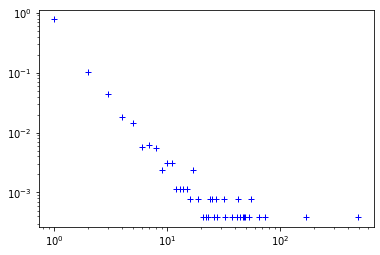

In [20]:
g1deg_dist = nx.degree_histogram(g1)
x = range(len(g1deg_dist))
y = [z/float(sum(g1deg_dist))for z in g1deg_dist]
plt.loglog(x,y,'+',color='blue',Marker='+')

### 度的幂律分布

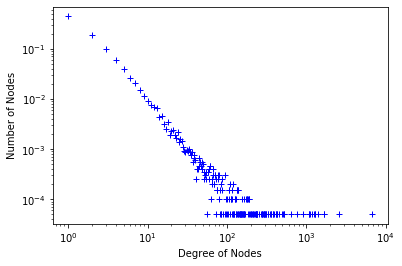

In [26]:
g2deg_dist = nx.degree_histogram(g2)
x = range(len(g2deg_dist))
y = [z/float(sum(g2deg_dist))for z in g2deg_dist]
plt.xlabel('Degree of Nodes')
plt.ylabel('Number of Nodes')
plt.loglog(x,y,'+',color='blue',Marker='+')
plt.savefig('./degree.png')

### 出度的幂律分布

In [22]:
# 获得出度的频数分布
d=pd.Series(list(dict(g2.out_degree()).values()))# 各节点对应的出度
d_counts = dict(d.value_counts())

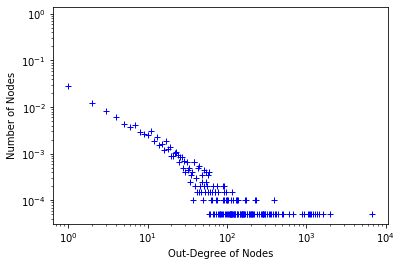

In [27]:
# 频数分布字典
g2_odeg_dist = {}
for i in range(d.max()+1):
    if i in d_counts:
        g2_odeg_dist[i]=d_counts[i]
    else:
        g2_odeg_dist[i]=0

# 频数分布对数图
g2_odeg_list = list(g2_odeg_dist.values())
x = range(len(g2_odeg_list))
y = [z/float(sum(g2_odeg_list))for z in g2_odeg_list]
plt.xlabel('Out-Degree of Nodes')
plt.ylabel('Number of Nodes')
plt.loglog(x,y,'+',color='blue',Marker='+')
plt.savefig('./outdegree.png')

### 入度的幂律分布

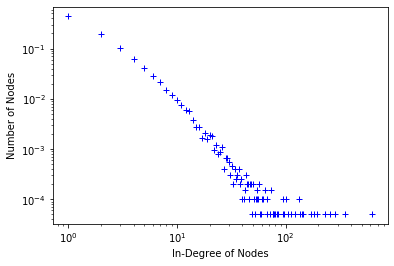

In [28]:
# 获得入度的频数分布
g2_ideg=pd.Series(list(dict(g2.in_degree()).values())) # 各节点对应的入度
g2_ideg_counts = dict(g2_ideg.value_counts()) # 不完全频数分布字典

# 完全频数分布字典
g2_ideg_dist = {}
for i in range(g2_ideg.max()+1):
    if i in g2_ideg_counts:
        g2_ideg_dist[i]=g2_ideg_counts[i]
    else:
        g2_ideg_dist[i]=0

# 频数分布对数图
g2_ideg_list = list(g2_ideg_dist.values())
x = range(len(g2_ideg_list))
y = [z/float(sum(g2_ideg_list))for z in g2_ideg_list]
plt.xlabel('In-Degree of Nodes')
plt.ylabel('Number of Nodes')
plt.loglog(x,y,'+',color='blue',Marker='+')
plt.savefig('./indegree.png')

# 小世界现象
### 平均聚类系数

In [24]:
print(nx.average_clustering(g1))
print(nx.average_clustering(g2))

0.001626256672456053
0.11378042753540316


### 网络平均路径长度 & 网络直径
python似乎没法计算这个图(可能是因为非连通性）的平均最短路径长度和直径，会报错
gephi结果是 网络平均路径长度为3.128，网络直径为11

## 连通性
### 连通分支数

In [51]:
nx.number_weakly_connected_components(g2)

7

In [57]:
for i in nx.weakly_connected_components(g2):
    print(len(i))

19733
3
2
2
2
2
2


In [58]:
nx.node_connectivity(g2)

0

In [64]:
g2_components = nx.weakly_connected_components(g2)


In [52]:
nx.number_strongly_connected_components(g2)

19746

## 密度

In [75]:
nx.density(g2)

0.00017477984585035215

# 影响力度量
## 节点中心性
### 点度中心性

In [65]:
degree_centrality = nx.degree_centrality(g2)
sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)

[(27803, 0.34504937958976956),
 (31890, 0.1324892377817169),
 (13638, 0.08498354013674347),
 (19222, 0.08371739680931882),
 (9051, 0.07075208913649025),
 (2078, 0.0656875158267916),
 (35773, 0.0645226639655609),
 (7027, 0.06244618890858445),
 (10001, 0.05930615345657128),
 (5629, 0.05677386680172195),
 (73, 0.05525449480881236),
 (33671, 0.054697391744745506),
 (11051, 0.04608761711825779),
 (19253, 0.03823752848822487),
 (14242, 0.03291972651304128),
 (6631, 0.02623448974423905),
 (3712, 0.026133198278045076),
 (18945, 0.025525449480881236),
 (22881, 0.024715117751329452),
 (14954, 0.02294251709293492),
 (22642, 0.021575082299316282),
 (10080, 0.021372499366928338),
 (10830, 0.02101797923524943),
 (23589, 0.020815396302861482),
 (25477, 0.020005064573309698),
 (20173, 0.019447961509242846),
 (23664, 0.019042795644466953),
 (22353, 0.01833375538110914),
 (30002, 0.018131172448721197),
 (2431, 0.017574069384654344),
 (35008, 0.016763737655102556),
 (21142, 0.016561154722714612),
 (36652

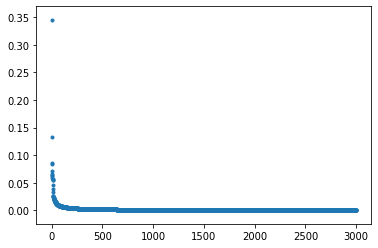

In [83]:
dc_list = sorted(list(degree_centrality.values()),reverse = True)
plt.scatter(x=range(3000),y=dc_list[0:3000],marker='.')

### 紧密中心性

In [68]:
closeness_centrality = nx.closeness_centrality(g2)
sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)

[(36652, 0.04729655187447747),
 (36628, 0.04685412510679079),
 (37471, 0.04673128393967531),
 (36819, 0.04428821337547126),
 (15940, 0.043417100378483876),
 (31890, 0.04195408708057641),
 (36909, 0.041818905328654635),
 (35008, 0.04135307060495182),
 (37107, 0.041030210101149905),
 (37557, 0.04051208722042728),
 (37087, 0.039725649750736954),
 (37248, 0.03966148573116442),
 (31255, 0.03943998556444973),
 (36799, 0.03936658374093691),
 (37651, 0.039213237871069624),
 (23086, 0.03913928332897377),
 (30767, 0.03913485036626628),
 (36055, 0.03873121072853023),
 (30809, 0.03854328541574596),
 (36834, 0.03851555631777484),
 (18163, 0.03849604002759319),
 (37462, 0.03841883665599825),
 (37331, 0.038345052614125234),
 (29543, 0.038262892769601445),
 (37644, 0.0381431021134399),
 (23458, 0.038124248977013414),
 (36581, 0.03795070590096929),
 (37562, 0.03790742617534765),
 (12137, 0.037872895818110125),
 (36528, 0.03772600775874774),
 (36693, 0.037653382565768244),
 (20434, 0.037639747446244154)

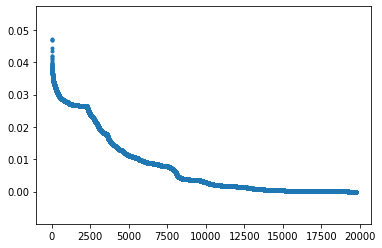

In [87]:
cc_list = sorted(list(closeness_centrality.values()),reverse = True)
plt.scatter(x=range(len(cc_list)),y=cc_list,marker='.')

### 介数中心性

In [67]:
betweenness_centrality = nx.betweenness_centrality(g2)
sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)

[(31890, 0.007299551976702549),
 (19222, 0.0032725227475726504),
 (35773, 0.00248093888998778),
 (13638, 0.0012499075376464928),
 (19253, 0.0008677584558816078),
 (22881, 0.0008484672323988284),
 (25477, 0.0007494308683315072),
 (10001, 0.00064972559521227),
 (3712, 0.0005097650803372901),
 (23664, 0.0004948104803395794),
 (11051, 0.0004651831862693352),
 (28957, 0.0004387406135523286),
 (30002, 0.0004319032066153135),
 (14242, 0.0003964795851623201),
 (33671, 0.0003759370011025233),
 (9051, 0.0003548583283440149),
 (29055, 0.0003502310158928028),
 (22353, 0.00033364946597317204),
 (23589, 0.00032971584704564723),
 (22642, 0.0002956396379683726),
 (20854, 0.0002899058896816697),
 (21375, 0.0002867705403731871),
 (27450, 0.00028639044820705104),
 (35008, 0.0002576750027185599),
 (22321, 0.00023267583248653137),
 (30199, 0.00023257833960542974),
 (25249, 0.0002290830635465196),
 (23838, 0.00022717333762291842),
 (18945, 0.0002158255541816986),
 (15191, 0.0002106533274906631),
 (11081, 0.

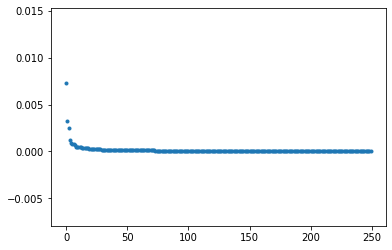

In [90]:
bc_list = sorted(list(betweenness_centrality.values()),reverse = True)
plt.scatter(x=range(250),y=bc_list[0:250],marker='.')

### 聚类系数

In [73]:
clustering = nx.clustering(g2)
sorted(clustering.items(), key=lambda x:x[1], reverse=True)

[(34082, 0.5),
 (19979, 0.5),
 (33506, 0.5),
 (18365, 0.5),
 (18535, 0.5),
 (18391, 0.5),
 (18393, 0.5),
 (23501, 0.5),
 (27706, 0.5),
 (9148, 0.5),
 (29995, 0.5),
 (27761, 0.5),
 (16814, 0.5),
 (26725, 0.5),
 (9222, 0.5),
 (19117, 0.5),
 (32478, 0.5),
 (22953, 0.5),
 (845, 0.5),
 (32663, 0.5),
 (19248, 0.5),
 (18524, 0.5),
 (18526, 0.5),
 (27853, 0.5),
 (7384, 0.5),
 (8580, 0.5),
 (18568, 0.5),
 (36023, 0.5),
 (27896, 0.5),
 (18597, 0.5),
 (9327, 0.5),
 (18606, 0.5),
 (9340, 0.5),
 (19882, 0.5),
 (19912, 0.5),
 (9352, 0.5),
 (9359, 0.5),
 (34636, 0.5),
 (27958, 0.5),
 (27959, 0.5),
 (18655, 0.5),
 (9388, 0.5),
 (6455, 0.5),
 (18729, 0.5),
 (9447, 0.5),
 (9453, 0.5),
 (28052, 0.5),
 (28053, 0.5),
 (20551, 0.5),
 (2277, 0.5),
 (20575, 0.5),
 (18760, 0.5),
 (28077, 0.5),
 (24736, 0.5),
 (13803, 0.5),
 (32796, 0.5),
 (28088, 0.5),
 (28089, 0.5),
 (33077, 0.5),
 (2573, 0.5),
 (18431, 0.5),
 (20938, 0.5),
 (18818, 0.5),
 (18826, 0.5),
 (9544, 0.5),
 (28146, 0.5),
 (9552, 0.5),
 (9574, 0.5),

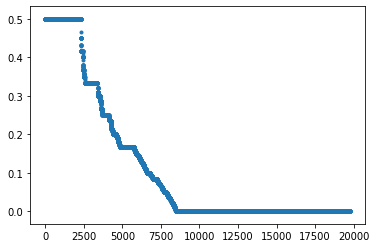

In [92]:
clustering_list = sorted(list(clustering.values()),reverse = True)
plt.scatter(x=range(len(clustering)),y=clustering_list,marker='.')

In [44]:
# 全图的最短路径平均长度
nx.average_shortest_path_length(g_all)

0.6567937360593893

In [46]:
nx.average_shortest_path_length(g2)

NetworkXError: Graph is not weakly connected.

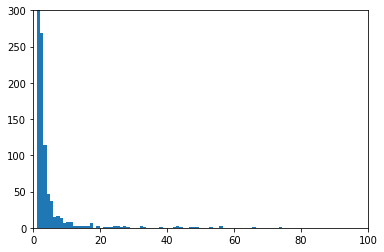

In [34]:
plt.axis([0,100,0,300])
pic_g1deg = plt.hist(dict(g1deg).values(),bins=500)

In [32]:
pd.DataFrame(g1.degree()).sort_values(ascending=False, by=1)

,0,1
62,31890,77
399,7354,55
39,26343,44
345,6921,43
168,4122,42
757,19024,32
49,36652,26
266,31916,26
906,23604,26
4,18163,25


In [33]:
pd.DataFrame(g2.degree()).sort_values(ascending=False, by=1)

,0,1
2,27803,6812
62,31890,2210
3226,13638,1646
2934,19222,1524
6797,9051,1385
1370,2078,1297
5131,7027,1231
585,10001,1162
10,5629,1117
4410,73,1089


In [39]:
g_all = nx.DiGraph()
edges_all = [tuple(x) for x in dfedges.values]
g_all.add_edges_from(edges_all)
print(g_all.number_of_edges())
print(g_all.number_of_nodes())

289003
37700


In [66]:
dict(g2.out_degree()).values()

dict_values([5, 228, 1988, 18, 882, 14, 1, 1064, 3, 43, 6, 3, 1, 153, 1, 4, 3, 39, 9, 71, 1, 6, 1, 681, 3, 66, 89, 0, 5, 6809, 4, 4, 1, 393, 8, 0, 0, 53, 199, 1, 3, 120, 59, 3, 91, 1111, 1, 54, 1, 380, 1, 6, 101, 297, 923, 15, 36, 6, 1, 1, 1, 4, 2, 2, 6, 1459, 15, 10, 2, 6, 24, 6, 8, 32, 2, 0, 20, 134, 1, 23, 4, 117, 71, 38, 135, 19, 39, 4, 6, 0, 18, 25, 42, 54, 3, 51, 164, 1, 6, 30, 15, 82, 0, 52, 9, 25, 44, 13, 3, 3, 65, 12, 12, 17, 2, 11, 17, 16, 33, 16, 13, 23, 9, 51, 15, 26, 29, 0, 3, 2, 8, 1, 21, 1, 5, 58, 6, 41, 31, 4, 99, 9, 8, 16, 2, 6, 22, 2, 75, 5, 1, 1610, 1, 3, 4, 10, 33, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 32, 16, 0, 0, 0, 0, 0, 0, 0, 0, 77, 0, 0, 0, 13, 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:

g2deg_dist = nx.degree_histogram(g2)
x = range(len(g2deg_dist))
y = [z/float(sum(g2deg_dist))for z in g2deg_dist]
plt.loglog(x,y,'+',color='blue',Marker='+')

In [27]:
pd.set_option('display.max_rows', None)
nodes_roll2_df.sort_values(ascending=False,by='stars')

,id,name,ml_target,stars
1687,1687,DaiAoki,0,86860
6917,6917,DigitalMachinist,0,76497
11304,11304,adrianbadarau,0,76060
20065,20065,centrodph,0,75668
20131,20131,Banjerr,0,75543
13190,13190,Streek,0,75157
6589,6589,JoanSerna,0,75113
5532,5532,thanosparavantis,0,74090
2050,2050,geoff-maddock,0,73958
2775,2775,jvandenaardweg,0,73808


In [71]:
g2deg_dist?